**DATA CLEANING**

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel("wine_quality_dataset.xlsx")

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.2,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,11.2,0.23,0.55,1.7,0.070,15.0,60.0,0.9800,?,0.50,9.0,6


In [ ]:
def create_binary_column(quality):
    return 1 if quality > 5 else 0

# Adding 'binary' column
df['binary'] = df['quality'].apply(lambda x: create_binary_column(x))

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,binary
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.2,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,11.2,0.23,0.55,1.7,0.070,15.0,60.0,0.9800,?,0.50,9.0,6,1


In [ ]:
binary_counts = df['binary'].value_counts()
print("Binary Column Value Counts:")
print(binary_counts)

Binary Column Value Counts:
1    856
0    747
Name: binary, dtype: int64


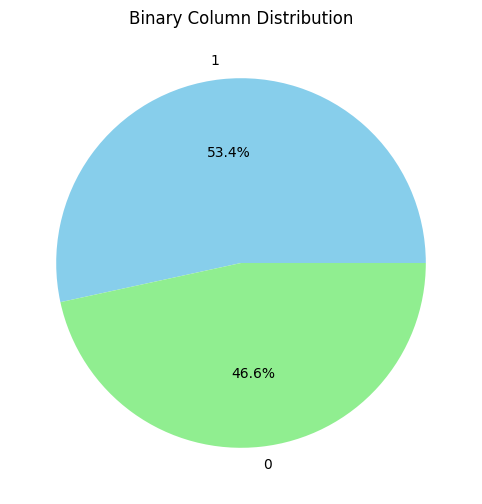

In [ ]:
plt.figure(figsize=(8, 6))
plt.pie(binary_counts, labels=binary_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])
plt.title('Binary Column Distribution')
plt.show()

In [ ]:
df.columns = [col.replace(" ", "_") for col in df.columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1603 entries, 0 to 1602
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1603 non-null   float64
 1   volatile_acidity      1603 non-null   float64
 2   citric_acid           1603 non-null   float64
 3   residual_sugar        1603 non-null   object 
 4   chlorides             1602 non-null   float64
 5   free_sulfur_dioxide   1603 non-null   float64
 6   total_sulfur_dioxide  1603 non-null   float64
 7   density               1603 non-null   float64
 8   pH                    1603 non-null   object 
 9   sulphates             1603 non-null   float64
 10  alcohol               1603 non-null   float64
 11  quality               1603 non-null   int64  
 12  binary                1603 non-null   int64  
dtypes: float64(9), int64(2), object(2)
memory usage: 162.9+ KB


In [ ]:
df.replace('?', pd.NA, inplace=True)
df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1601 entries, 0 to 1602
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1601 non-null   float64
 1   volatile_acidity      1601 non-null   float64
 2   citric_acid           1601 non-null   float64
 3   residual_sugar        1601 non-null   object 
 4   chlorides             1601 non-null   float64
 5   free_sulfur_dioxide   1601 non-null   float64
 6   total_sulfur_dioxide  1601 non-null   float64
 7   density               1601 non-null   float64
 8   pH                    1601 non-null   object 
 9   sulphates             1601 non-null   float64
 10  alcohol               1601 non-null   float64
 11  quality               1601 non-null   int64  
 12  binary                1601 non-null   int64  
dtypes: float64(9), int64(2), object(2)
memory usage: 175.1+ KB


**1. converting object type into float**

In [ ]:
df["residual_sugar"]=pd.to_numeric(df["residual_sugar"],errors='coerce')

In [ ]:
df["pH"]=pd.to_numeric(df["pH"],errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1601 entries, 0 to 1602
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1601 non-null   float64
 1   volatile_acidity      1601 non-null   float64
 2   citric_acid           1601 non-null   float64
 3   residual_sugar        1600 non-null   float64
 4   chlorides             1601 non-null   float64
 5   free_sulfur_dioxide   1601 non-null   float64
 6   total_sulfur_dioxide  1601 non-null   float64
 7   density               1601 non-null   float64
 8   pH                    1601 non-null   float64
 9   sulphates             1601 non-null   float64
 10  alcohol               1601 non-null   float64
 11  quality               1601 non-null   int64  
 12  binary                1601 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 175.1 KB


**2. replacing missing values with median**

In [ ]:
df.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          1
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
binary                  0
dtype: int64

In [ ]:
df["residual_sugar"]=df["residual_sugar"].fillna(df['residual_sugar'].median())

**3. deleting duplicate rows**

In [ ]:
df.shape

(1601, 13)

In [ ]:
df.duplicated().sum()

242

In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
df.shape

(1359, 13)

In [ ]:
df = df.reset_index(drop=True)

In [ ]:
num_cols = [col for col in df.columns if (df[col].dtype in ["int64", "float64"]) and (df[col].nunique() > 50)]
num_cols

['fixed_acidity',
 'volatile_acidity',
 'citric_acid',
 'residual_sugar',
 'chlorides',
 'free_sulfur_dioxide',
 'total_sulfur_dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [ ]:
target = [col for col in df.columns if df[col].nunique()<10]
target

['quality', 'binary']

**EDA**

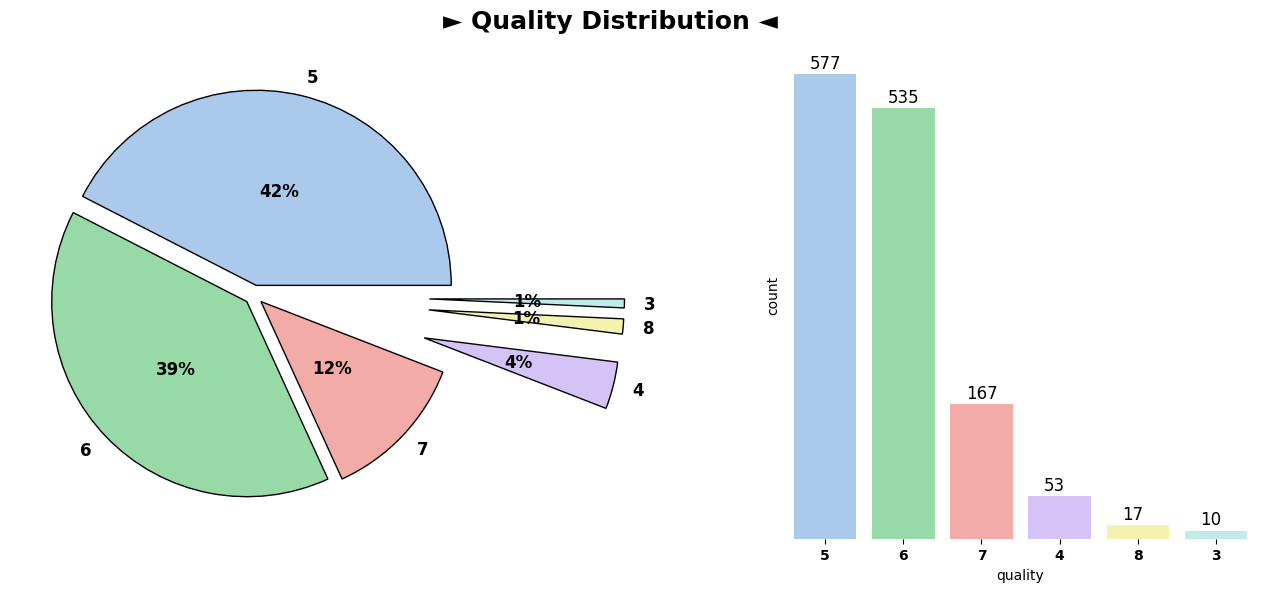

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(15, 6), width_ratios=[2,1])

textprops={'fontsize': 12, 'weight': 'bold',"color": "black"}
ax[0].pie(df["quality"].value_counts().to_list(),
        colors=["#abc9ea","#98daa7","#f3aba8","#d3c3f7","#f3f3af","#c0ebe9"],
        labels=df["quality"].value_counts().index.to_list(),
        autopct='%1.f%%',
        explode=([.05]*3 +[.9,.9,.9]),
        pctdistance=0.5,
        wedgeprops={'linewidth' : 1, 'edgecolor' : 'black'},
        textprops=textprops)

sns.countplot(x = "quality", data=df, palette = "pastel6", order=df["quality"].value_counts().to_dict().keys())
for p, count in enumerate(df["quality"].value_counts().to_dict().values(),0):
    ax[1].text(p-0.2, count + 8, count, color='black', fontsize=12)
plt.setp(ax[1].get_xticklabels(), fontweight="bold")
plt.yticks([])
plt.box(False)
fig.suptitle(x=0.56, t=f'► Quality Distribution ◄', fontsize=18, fontweight='bold')
plt.tight_layout()
plt.show()


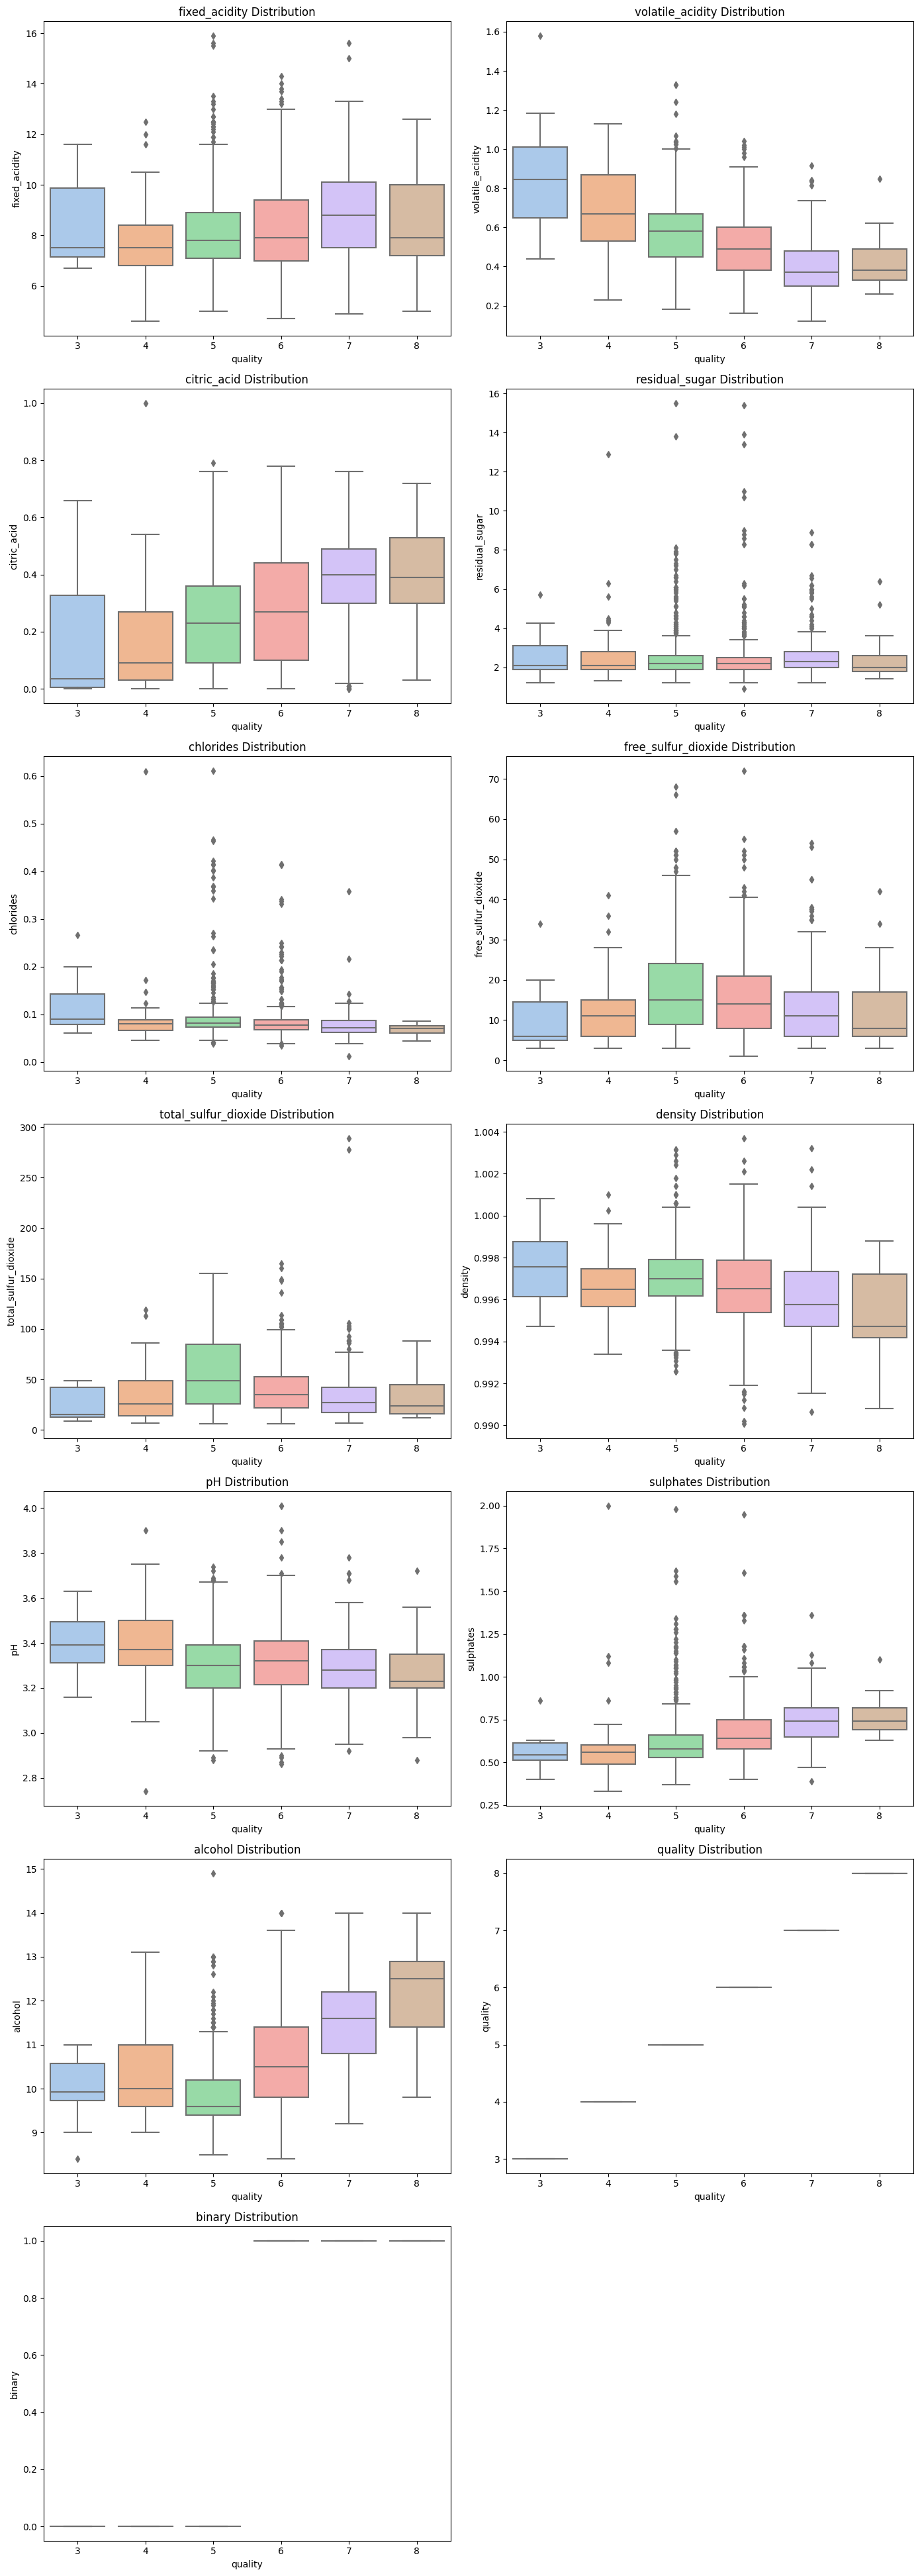

In [ ]:
num_cols = df.select_dtypes(include='number').columns

plt.figure(figsize=(14, len(num_cols)*3))

for idx, column in enumerate(num_cols):
    plt.subplot(len(num_cols)//2 + 1, 2, idx + 1)
    sns.boxplot(x="quality", y=column, data=df, palette="pastel")
    plt.title(f"{column} Distribution")
    plt.tight_layout()

plt.show()

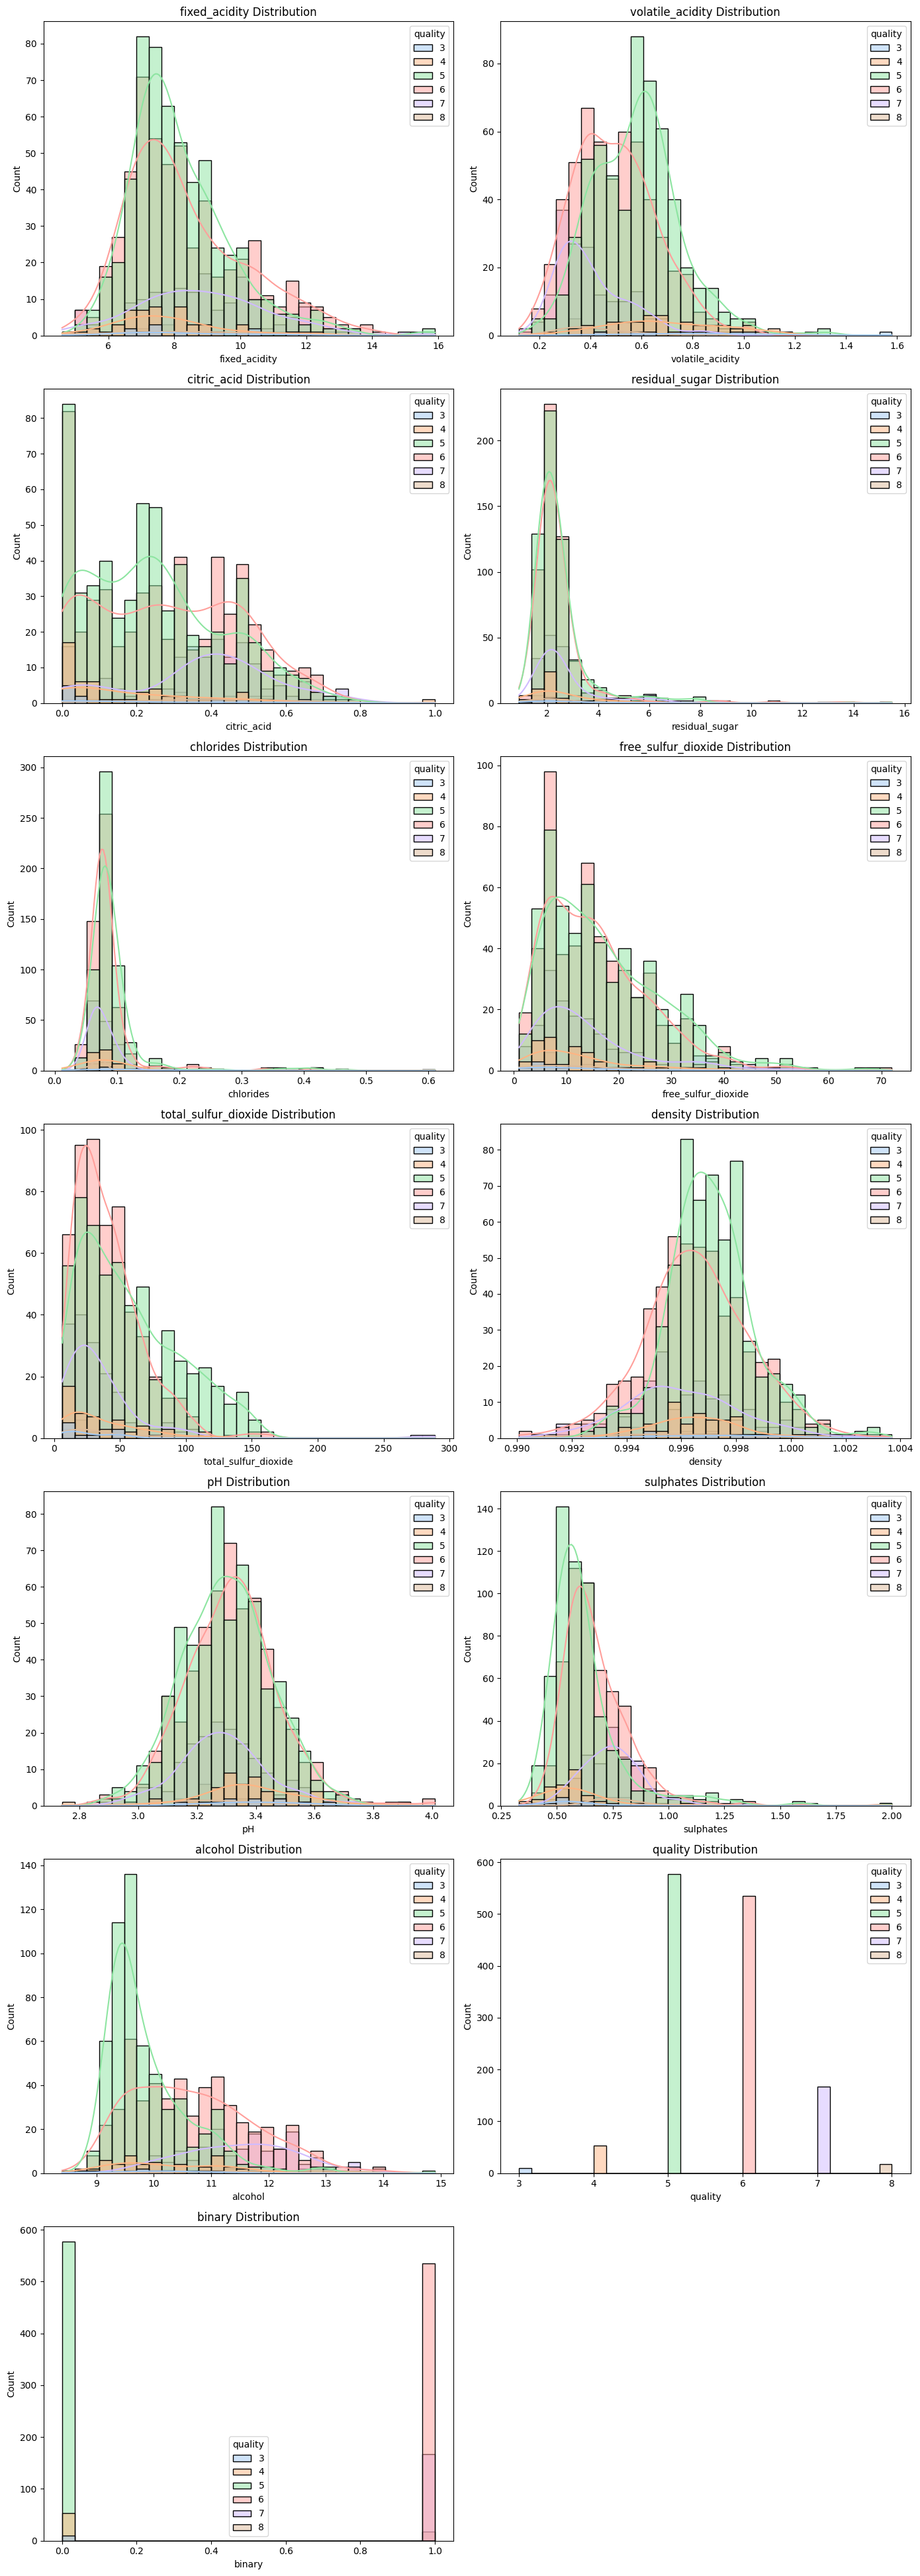

In [ ]:
plt.figure(figsize=(14,len(num_cols)*3))
for idx,column in enumerate(num_cols):
    plt.subplot(len(num_cols)//2+1,2,idx+1)
    sns.histplot(x=column, hue="quality", data=df,bins=30,kde=True, palette="pastel")
    plt.title(f"{column} Distribution")
    plt.tight_layout()

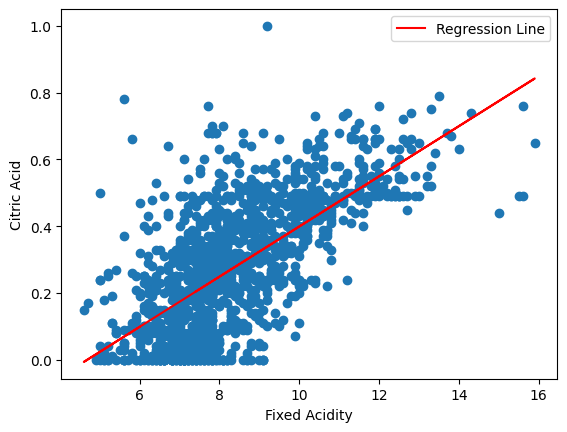

In [ ]:
plt.scatter(df.fixed_acidity, df.citric_acid)
slope, intercept = np.polyfit(df.fixed_acidity, df.citric_acid, 1)
plt.plot(df.fixed_acidity, slope * df.fixed_acidity + intercept, color='red', label='Regression Line')
plt.xlabel('Fixed Acidity')
plt.ylabel('Citric Acid')
plt.legend()

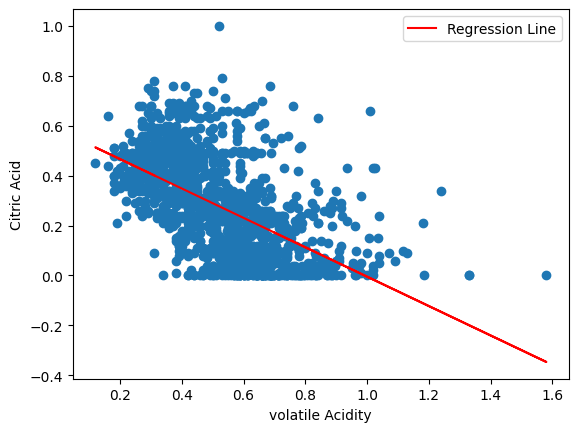

In [ ]:
plt.scatter(df.volatile_acidity, df.citric_acid)
slope, intercept = np.polyfit(df.volatile_acidity, df.citric_acid, 1)
plt.plot(df.volatile_acidity, slope * df.volatile_acidity + intercept, color='red', label='Regression Line')
plt.xlabel('volatile Acidity')
plt.ylabel('Citric Acid')
plt.legend()

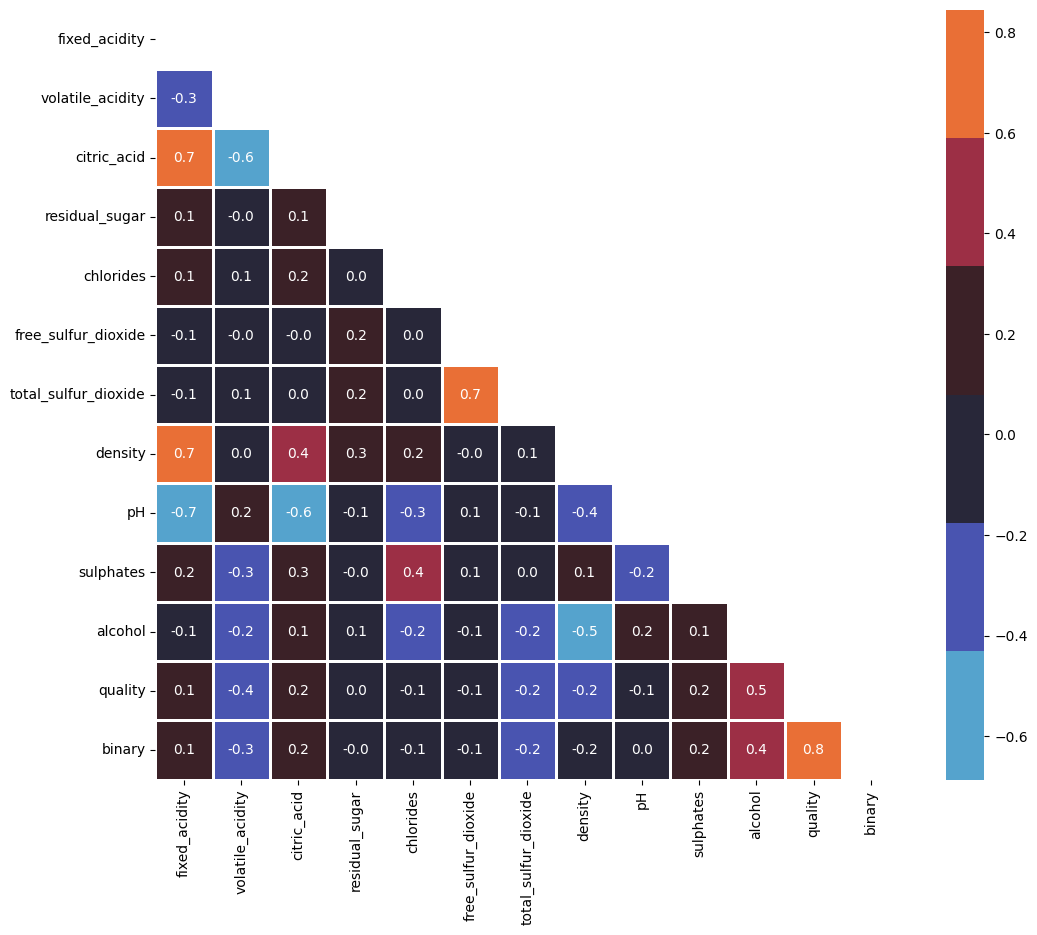

In [ ]:
plt.figure(figsize=(12,10))
corr=df[num_cols].corr(numeric_only=True)
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr, annot=True, fmt=".1f", linewidths=1, mask=mask, cmap=sns.color_palette("icefire"));

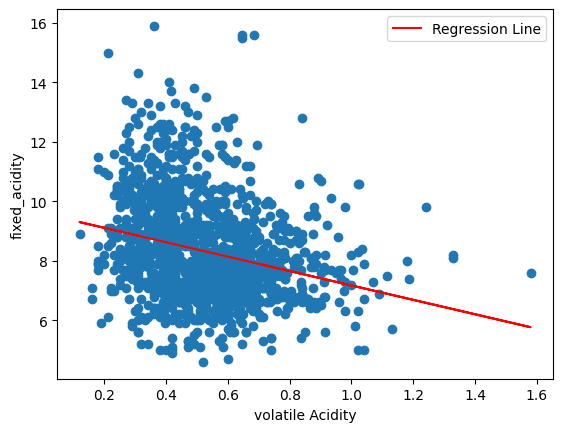

In [ ]:
plt.scatter(df.volatile_acidity, df.fixed_acidity)
slope, intercept = np.polyfit(df.volatile_acidity, df.fixed_acidity, 1)
plt.plot(df.volatile_acidity, slope * df.volatile_acidity + intercept, color='red', label='Regression Line')
plt.xlabel('volatile Acidity')
plt.ylabel('fixed_acidity')
plt.legend()

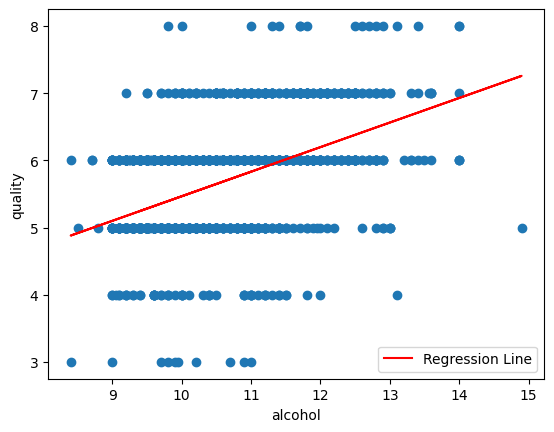

In [ ]:
plt.scatter(df.alcohol, df.quality)
slope, intercept = np.polyfit(df.alcohol, df.quality, 1)
plt.plot(df.alcohol, slope * df.alcohol + intercept, color='red', label='Regression Line')
plt.xlabel('alcohol')
plt.ylabel('quality')
plt.legend()

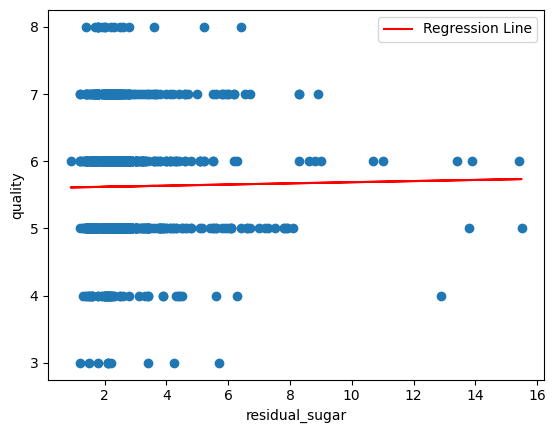

In [ ]:
plt.scatter(df.residual_sugar, df.quality)
slope, intercept = np.polyfit(df.residual_sugar, df.quality, 1)
plt.plot(df.residual_sugar, slope * df.residual_sugar + intercept, color='red', label='Regression Line')
plt.xlabel('residual_sugar')
plt.ylabel('quality')
plt.legend()

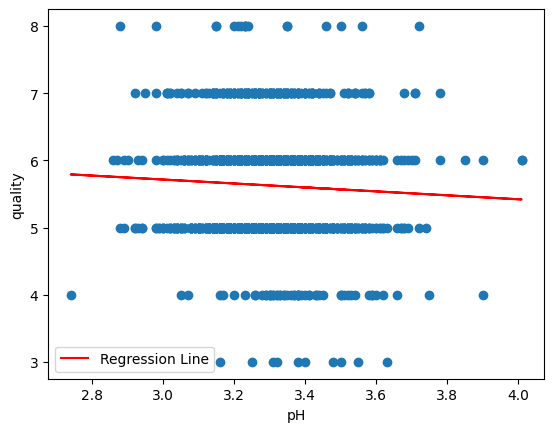

In [ ]:
plt.scatter(df.pH, df.quality)
slope, intercept = np.polyfit(df.pH, df.quality, 1)
plt.plot(df.pH, slope * df.pH + intercept, color='red', label='Regression Line')
plt.xlabel('pH')
plt.ylabel('quality')
plt.legend()

**CLASSIFICATION**

In [ ]:
x = df.iloc[:,:11]
x.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4


In [ ]:
y = df.iloc[:,12:13]
y.head()

,binary
0,0
1,0
2,0
3,1
4,0


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= .2,random_state=12)

**1. LOGISTIC REGRESSION**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Initialize and fit logistic regression model
logistic_model = LogisticRegression(max_iter=10000)  # Increase max_iter for convergence
logistic_model.fit(x_train, y_train)
#Predictions
predictions = logistic_model.predict(x_test)
#Model evaluation
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, predictions))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, predictions))

Accuracy: 0.74

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.73      0.74       135
           1       0.74      0.76      0.75       137

    accuracy                           0.74       272
   macro avg       0.74      0.74      0.74       272
weighted avg       0.74      0.74      0.74       272


Confusion Matrix:
[[ 98  37]
 [ 33 104]]


**2. RANDOM FOREST**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
# Standardize the features (optional but recommended)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Create a Random Forest model and train it
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=3)
rf_model.fit(x_train_scaled, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(x_test_scaled)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Accuracy: 0.74

Confusion Matrix:
[[ 98  37]
 [ 33 104]]

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.73      0.74       135
           1       0.74      0.76      0.75       137

    accuracy                           0.74       272
   macro avg       0.74      0.74      0.74       272
weighted avg       0.74      0.74      0.74       272



**3. KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [ ]:
# Standardize the features (important for KNN)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Create a KNN model and train it
k_value = 5  # You can adjust the number of neighbors
knn_model = KNeighborsClassifier(n_neighbors=k_value)
knn_model.fit(x_train_scaled, y_train)

# Make predictions on the test set
y_pred = knn_model.predict(x_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Accuracy: 0.68

Confusion Matrix:
[[ 82  53]
 [ 35 102]]

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.61      0.65       135
           1       0.66      0.74      0.70       137

    accuracy                           0.68       272
   macro avg       0.68      0.68      0.67       272
weighted avg       0.68      0.68      0.67       272



**4. SVC**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Initialize SVM classifier
svm = SVC(kernel='linear')
# Train the model
svm.fit(x_train, y_train)
# Make predictions
y_pred = svm.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Show classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.74

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.74      0.74       135
           1       0.74      0.74      0.74       137

    accuracy                           0.74       272
   macro avg       0.74      0.74      0.74       272
weighted avg       0.74      0.74      0.74       272


Confusion Matrix:
[[100  35]
 [ 36 101]]


**5. DECISION TREE**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Initialize Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier
clf.fit(x_train, y_train)

# Predict using the test set
predictions = clf.predict(x_test)
#Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")
# Classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, predictions))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, predictions))

Accuracy: 0.71

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.72      0.71       135
           1       0.71      0.69      0.70       137

    accuracy                           0.71       272
   macro avg       0.71      0.71      0.71       272
weighted avg       0.71      0.71      0.71       272


Confusion Matrix:
[[97 38]
 [42 95]]


**6. NAIVE BAYES**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
# Standardize the features (optional but recommended for Naive Bayes)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Create a Naive Bayes model and train it
nb_model = GaussianNB()
nb_model.fit(x_train_scaled, y_train)

# Make predictions on the test set
y_pred = nb_model.predict(x_test_scaled)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Accuracy: 0.74

Confusion Matrix:
[[ 95  40]
 [ 32 105]]

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.70      0.73       135
           1       0.72      0.77      0.74       137

    accuracy                           0.74       272
   macro avg       0.74      0.74      0.73       272
weighted avg       0.74      0.74      0.74       272



 **7. BOOSTING**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
print("Gradient Boosting")

# Initialize Gradient Boosting Classifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Fit the classifier to the training data
clf.fit(x_train, y_train)

# Make predictions
predictions = clf.predict(x_test)

# Classification report
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, predictions))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))
print("\nAda Boost Classifier")
clf = AdaBoostClassifier(n_estimators=50, random_state=42)

# Fit the classifier to the training data
clf.fit(x_train, y_train)

# Make predictions
predictions = clf.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")

# Generate and print classification report
print("\nClassification Report:")
print(classification_report(y_test, predictions))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)


Gradient Boosting
Accuracy: 0.76
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.77      0.76       135
           1       0.77      0.76      0.76       137

    accuracy                           0.76       272
   macro avg       0.76      0.76      0.76       272
weighted avg       0.76      0.76      0.76       272

Confusion Matrix:
[[104  31]
 [ 33 104]]

Ada Boost Classifier
Accuracy: 0.76

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.76      0.76       135
           1       0.77      0.77      0.77       137

    accuracy                           0.76       272
   macro avg       0.76      0.76      0.76       272
weighted avg       0.76      0.76      0.76       272



**Neural Network**

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine

# Feature scaling for better convergence
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Building the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
     tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

# Compiling the model with a chosen learning rate
learning_rate = 0.01  # You can adjust this value
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training the model
history = model.fit(x_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(x_test_scaled, y_test))

y_pred = np.argmax(model.predict(x_test_scaled), axis=-1)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Generating classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Creating confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Epoch 1/50
34/34 [==============================] - 1s 10ms/step - loss: 0.5771 - accuracy: 0.6946 - val_loss: 0.5066 - val_accuracy: 0.7684
Epoch 2/50
34/34 [==============================] - 0s 3ms/step - loss: 0.5214 - accuracy: 0.7433 - val_loss: 0.5225 - val_accuracy: 0.7647
Epoch 3/50
34/34 [==============================] - 0s 3ms/step - loss: 0.5033 - accuracy: 0.7553 - val_loss: 0.5117 - val_accuracy: 0.7610
Epoch 4/50
34/34 [==============================] - 0s 3ms/step - loss: 0.4904 - accuracy: 0.7691 - val_loss: 0.5060 - val_accuracy: 0.7463
Epoch 5/50
34/34 [==============================] - 0s 3ms/step - loss: 0.4703 - accuracy: 0.7682 - val_loss: 0.5072 - val_accuracy: 0.7610
Epoch 6/50
34/34 [==============================] - 0s 3ms/step - loss: 0.4748 - accuracy: 0.7691 - val_loss: 0.5248 - val_accuracy: 0.7610
Epoch 7/50
34/34 [==============================] - 0s 5ms/step - loss: 0.4561 - accuracy: 0.7866 - val_loss: 0.5286 - val_accuracy: 0.7537
Epoch 8/50
34/34 [=